In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [32]:

# Load and preprocess the data
data = pd.read_csv('data/gaze_data.csv')
X = data[['l_x', 'l_y', 'l_z', 'r_x', 'r_y', 'r_z']].values
y = data[['x', 'y']].values

# Normalize the features and target variables
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# If you want to transform predictions back to the original scale for interpretability:
# y_pred = model.predict(X_val)
# y_pred_original = scaler_y.inverse_transform(y_pred)

In [33]:
X

array([[ 0.66401295,  2.96532592, -0.15261674,  0.22978718,  3.808497  ,
        -0.40866425],
       [ 2.33250228,  1.48011227, -0.17841529,  1.93431848,  1.85645553,
        -0.31753077],
       [ 2.6096528 ,  0.87653471, -0.2123242 ,  3.21722061,  0.58369199,
        -0.3158022 ],
       ...,
       [-1.15590418,  1.09121892,  1.27051811, -0.98694546,  0.31379472,
         0.8130525 ],
       [-1.16728785,  1.08979219,  1.28433429, -0.96203082,  0.2721836 ,
         0.80224089],
       [-1.18534598,  1.07747971,  1.28256897, -0.94898589,  0.30844934,
         0.80191014]])

In [34]:
y

array([[-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487, -1.22474487],
       [-1.22474487,

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
# Define the neural network model
def create_model():
    model = Sequential([
        Input(shape=(6,)),
        Dense(64, activation='relu'),
        Dropout(0.01),
        Dense(32, activation='relu'),
        Dropout(0.01),
        Dense(16, activation='relu'),
        Dense(2)  # Output layer with 2 neurons for x and y coordinates
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [107]:
# Create the model
model = create_model()

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model on the individual's data
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping],
    verbose=0
)

# Evaluate the model
loss, mae = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")

Validation Loss: 0.10068897902965546, Validation MAE: 0.16820186376571655


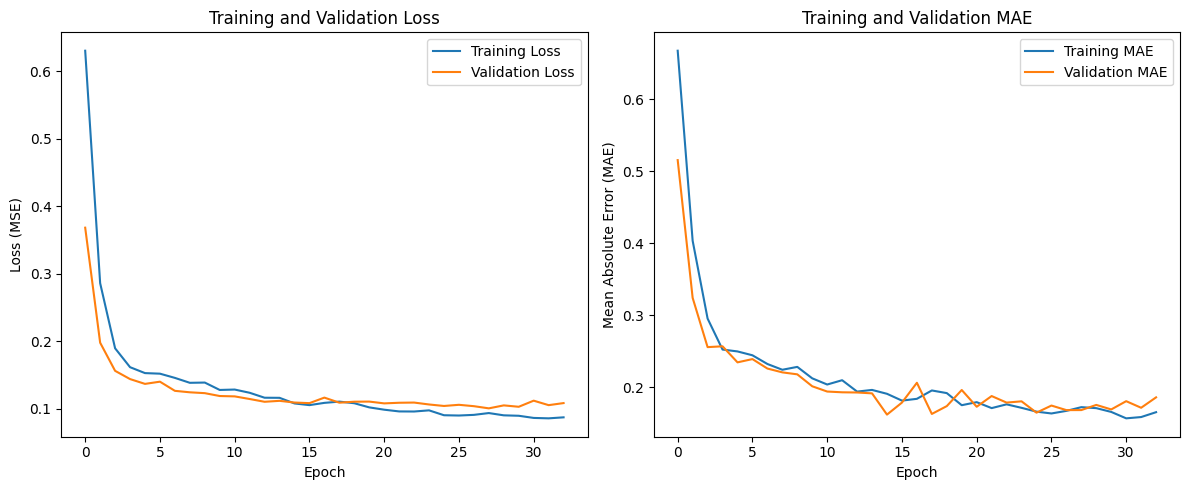

In [108]:
# Function to plot training history
def plot_training_history(history):
    # Plot training & validation loss
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Mean Absolute Error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Training and Validation MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# After training, call this function with the model's history
plot_training_history(history)


In [109]:
# Example: New data for prediction (replace with actual values)
# Replace with a 2D array where each row is a sample [l_x, l_y, l_z, r_x, r_y, r_z]
new_data = [[0.0013433971064237271,0.00022330853988272725,-0.008213971820690993,0.001962751337769686,0.0007256233978807369,-0.0072121824537406815
]]  # Example single sample

# Scale the new data using the scaler_X
new_data_scaled = scaler_X.transform(new_data)

# Make predictions
predicted_scaled = model.predict(new_data_scaled)

# Inverse transform the predictions to get the coordinates in the original scale
predicted_original = scaler_y.inverse_transform(predicted_scaled)

print("Predicted coordinates (scaled):", predicted_scaled)
print("Predicted coordinates (original scale):", predicted_original)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted coordinates (scaled): [[-1.0937799 -0.9415123]]
Predicted coordinates (original scale): [[101.32031 132.56699]]
